In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns            

Votre objectif est d'effectuer les tâches ci-dessous en vous référant à l'article du site 538 (lien ci-dessous) et de voir si vous arrivez à la même conclusion. Vous devrez utiliser vos compétences en pandas et en data viz pour déterminer si les notes de Fandango en 2015 étaient orientées vers une meilleure évaluation/notation des films dans le but de vendre plus de billets.

Effectuez les tâches écrites en gras.

In [2]:
# = pd.read_csv('fandango_scrape.csv')
#df.head()

In [3]:
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/fandango_scrape.csv'
df = pd.read_csv(url)
df

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

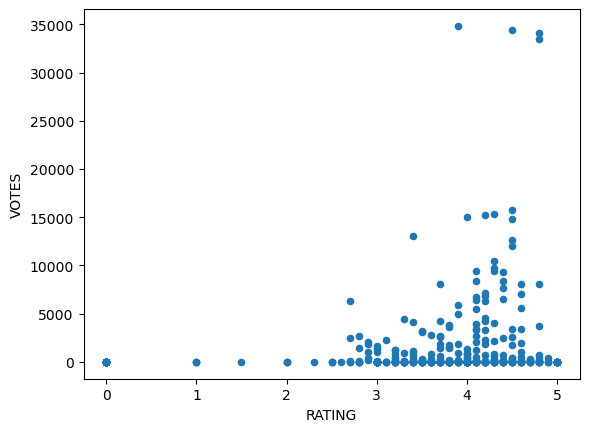

In [6]:
df.plot(kind='scatter', x= 'RATING',y = 'VOTES')

In [7]:
df.corr()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_21912\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
def find_year(texte_film):
    debut_parenthese = texte_film.find('(')
    fin_parenthese = texte_film.find(')')
    
    if debut_parenthese != -1 and fin_parenthese != -1:
        annee_str = texte_film[debut_parenthese + 1:fin_parenthese]
        
        # Vérifier que la sous-chaîne est composée de caractères numériques
        if annee_str.isdigit():
            annee = int(annee_str)
            return annee
        else:
            return None
    else:
        return None

In [9]:
df['YEAR']= df['FILM'].apply(find_year)

In [10]:
df['YEAR'] 

0      2015.0
1      2015.0
2      2015.0
3      2015.0
4      2015.0
        ...  
499    2015.0
500    2015.0
501    2015.0
502    1964.0
503    2012.0
Name: YEAR, Length: 504, dtype: float64

In [11]:
df['YEAR'].value_counts()

2015.0    474
2014.0     24
2016.0      1
1964.0      1
2012.0      1
Name: YEAR, dtype: int64

In [12]:
cn = df['YEAR'].value_counts()

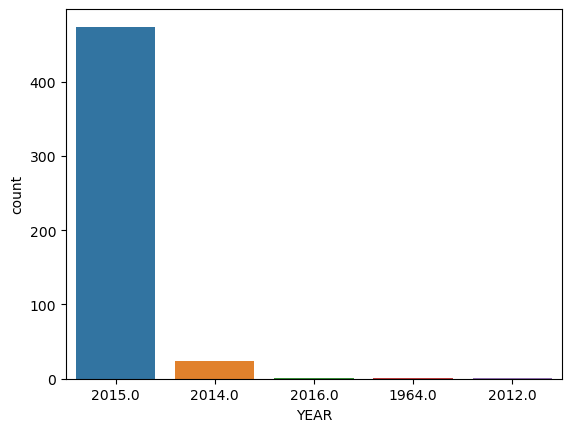

In [13]:
order = df['YEAR'].value_counts().index
sns.countplot(x='YEAR', data=df, order=order)

# Ajustez les étiquettes de l'axe x pour éviter le chevauchement
#plt.xticks(rotation=45, ha='right')

# Affichez le tracé
plt.show()

In [14]:
#TRIE DECROISSANTE
df.sort_values('VOTES',  ascending =False).head(10) 

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015.0
1,Jurassic World (2015),4.5,4.5,34390,2015.0
2,American Sniper (2015),5.0,4.8,34085,2015.0
3,Furious 7 (2015),5.0,4.8,33538,2015.0
4,Inside Out (2015),4.5,4.5,15749,2015.0
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014.0
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015.0
7,Minions (2015),4.0,4.0,14998,2015.0
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015.0
9,Into the Woods (2014),3.5,3.4,13055,2014.0


In [15]:
#df[(df['VOTES'] == 0) | (df['RATING'] == 0)].sum()

(df['VOTES']==0).sum()

69

In [16]:
new_df = df.drop(df[df['VOTES'] == 0].index, inplace=True)

In [17]:
new_df = df

In [18]:
new_df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015.0
1,Jurassic World (2015),4.5,4.5,34390,2015.0
2,American Sniper (2015),5.0,4.8,34085,2015.0
3,Furious 7 (2015),5.0,4.8,33538,2015.0
4,Inside Out (2015),4.5,4.5,15749,2015.0
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015.0
431,The Intern (2015),5.0,5.0,1,2015.0
432,The Park Bench (2015),5.0,5.0,1,2015.0
433,The Wanted 18 (2015),5.0,5.0,1,2015.0


C:\Users\ibrah\AppData\Local\Temp\ipykernel_21912\2138327660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RATING'])


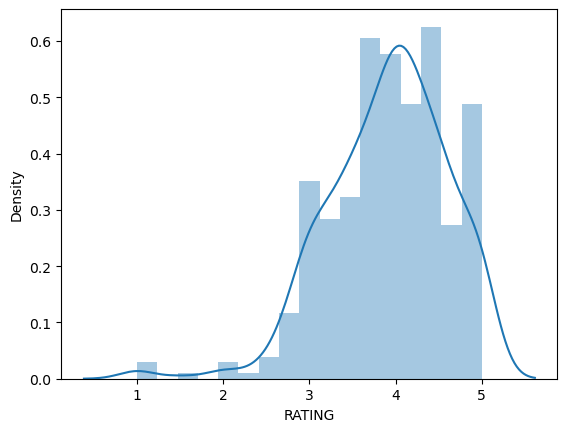

In [19]:
sns.distplot(df['RATING'])
plt.show()

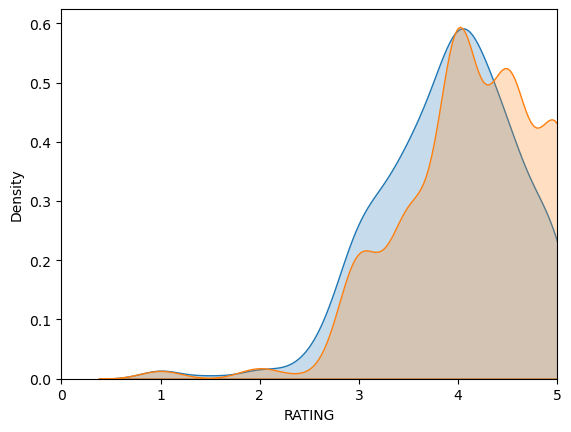

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposez que df est votre DataFrame et 'YEAR' est la colonne que vous voulez tracer
sns.kdeplot(data=new_df, x='RATING', fill=True)
sns.kdeplot(data=new_df, x='STARS', fill=True)

# Ajustez les étiquettes de l'axe x pour éviter le chevauchement
#plt.xticks(rotation=45, ha='right')
plt.xlim(0,5)

# Affichez le tracé
plt.show()


In [21]:
new_df['STARS_DIFF'] = (new_df['STARS']-new_df['RATING']).round(1)
new_df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015.0,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015.0,0.0
2,American Sniper (2015),5.0,4.8,34085,2015.0,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015.0,0.2
4,Inside Out (2015),4.5,4.5,15749,2015.0,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015.0,0.0
431,The Intern (2015),5.0,5.0,1,2015.0,0.0
432,The Park Bench (2015),5.0,5.0,1,2015.0,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015.0,0.0


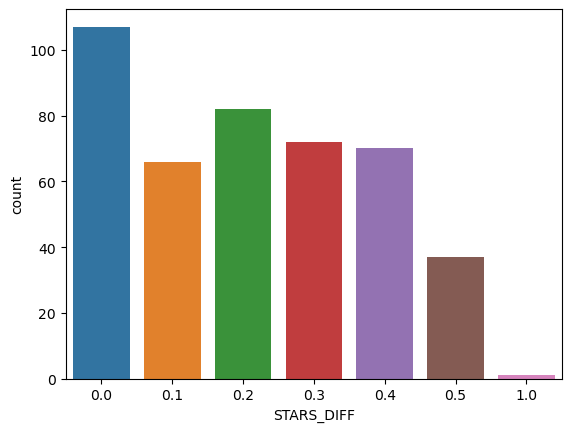

In [22]:
sns.countplot(x='STARS_DIFF',data=new_df)
#lt.xticks(rotation=45, ha='right')

plt.show()

In [23]:
new_df.sort_values('STARS_DIFF',ascending = False).head(1)

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015.0,1.0


In [24]:
 # Lecture du fichier all_sites_scores.csv dans le dataframe all_sites
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/all_sites_scores.csv'
DF = pd.read_csv(url)
DF.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [25]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [26]:
DF.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


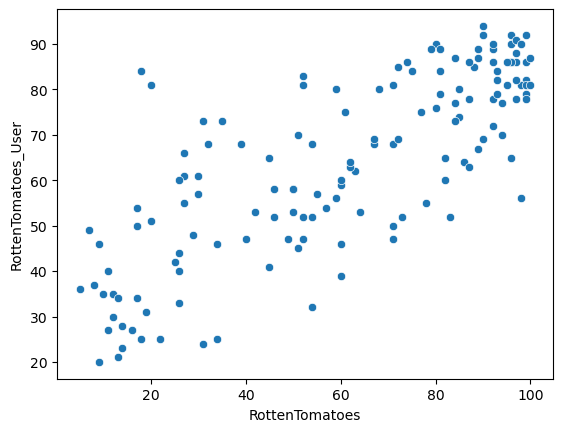

In [27]:
sns.scatterplot(x='RottenTomatoes', y='RottenTomatoes_User', data=DF)
plt.show()

In [28]:
DF['diff'] = DF['RottenTomatoes']-DF['RottenTomatoes_User']
DF['diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: diff, Length: 146, dtype: int64

In [29]:
DF['abs_diff'] = abs(DF['diff'])
DF['abs_diff'].mean()

15.095890410958905

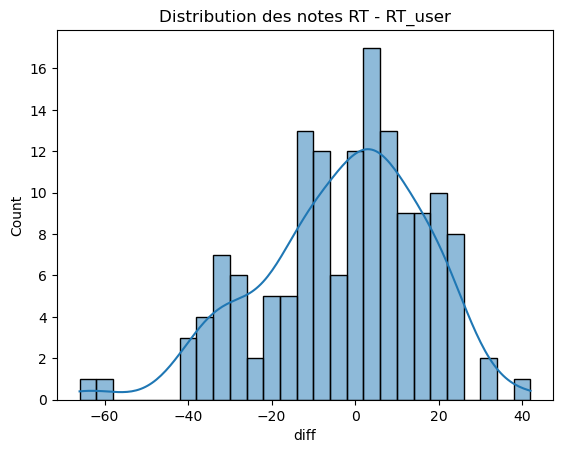

In [30]:
# Supposez que df est votre DataFrame et 'YEAR' est la colonne que vous voulez tracer
#sns.histplot(DF['diff'], kde=True)
#sns.histplot(DF['diff'], kde=True, bins=range(int(DF['diff'].min()), int(DF['diff'].max()) + 3, 2))
sns.histplot(DF['diff'], kde=True, binwidth=4)
#sns.kdeplot(data=DF, x='diff', fill=True)
plt.title('Distribution des notes RT - RT_user')
# Affichez le tracé
plt.show()

<Axes: xlabel='abs_diff', ylabel='Count'>

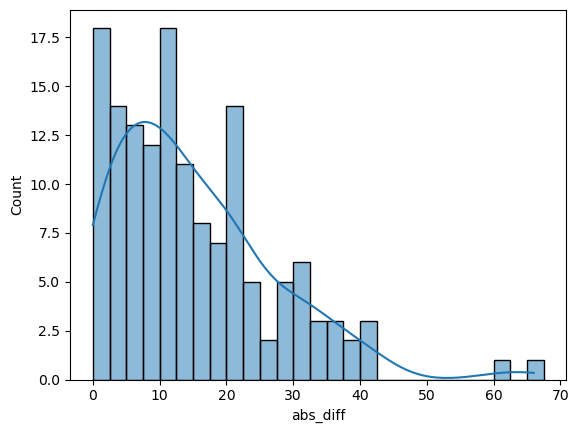

In [31]:
sns.histplot(DF['abs_diff'],kde = True, binwidth = 2.5)

In [32]:
#DF[DF['diff']<0].sort_values('diff',ascending = True)
DF[['FILM','diff']].sort_values('diff',ascending = True).head(5)

,FILM,diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [33]:
DF[['FILM','diff']].sort_values('diff',ascending = False).head(5)

,FILM,diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


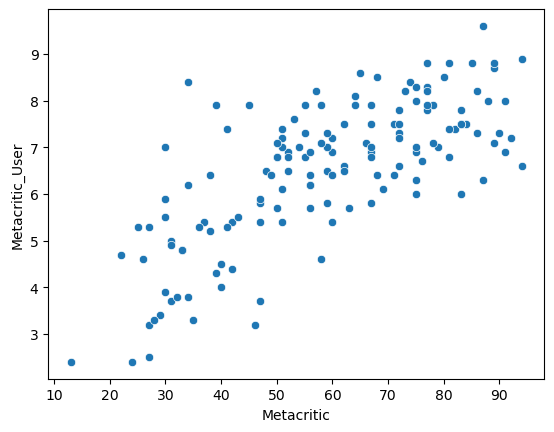

In [34]:
sns.scatterplot(x='Metacritic', y='Metacritic_User', data=DF)
plt.show()

In [35]:
'Créez un nuage de points montrant la relation entre le nombre de votes sur MetaCritic et le nombre de votes sur IMDb'

'Créez un nuage de points montrant la relation entre le nombre de votes sur MetaCritic et le nombre de votes sur IMDb'

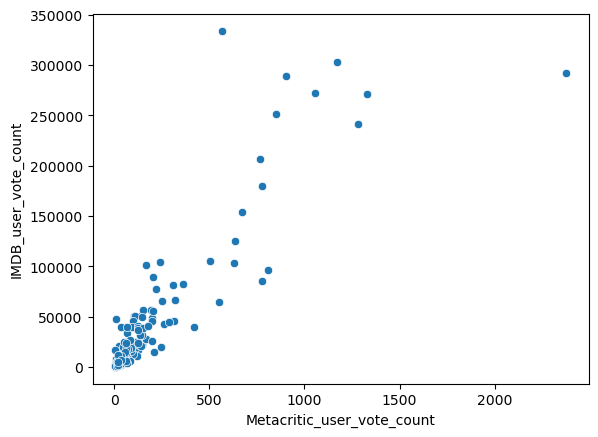

In [36]:
sns.scatterplot(x= 'Metacritic_user_vote_count',y = 'IMDB_user_vote_count',data = DF)
plt.show()

# Notez qu'il y a deux valeurs aberrantes (outliers) ici. Le film ayant obtenu le plus grand nombre de votes sur IMDb n'a qu'environ 500 notes MetaCritic. Quel est ce film ?

In [37]:
DF.sort_values('IMDB_user_vote_count',ascending = False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff,abs_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


In [38]:
DF.sort_values('Metacritic_user_vote_count',ascending = False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff,abs_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


Tâche : Combinez la table Fandango avec la table all_sites. Tous les films de la table Fandango ne sont pas dans la table all_sites, car certains films de Fandango ont très peu ou pas de critiques. Nous voulons uniquement comparer les films qui se trouvent dans les deux DataFrames, donc effectuez une fusion inner pour fusionner les deux DataFrames en fonction des colonnes FILM.



In [39]:
fusion = pd.merge(df,DF)

In [40]:
fusion

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff,abs_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015.0,0.1,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015.0,0.0,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015.0,0.2,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015.0,0.2,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015.0,0.0,98,90,94,8.9,8.6,807,96252,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015.0,0.0,87,63,68,6.4,6.7,19,5289,24,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015.0,0.4,95,81,87,6.3,7.0,18,1107,14,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015.0,0.3,93,84,67,7.0,7.8,4,732,9,9
143,Tangerine (2015),4.0,3.9,36,2015.0,0.1,95,86,86,7.3,7.4,14,696,9,9


In [41]:

DF=DF.drop('abs_diff',axis = 1)

In [42]:
fusion = pd.merge(df,DF)
fusion

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015.0,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015.0,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015.0,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015.0,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015.0,0.0,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015.0,0.0,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015.0,0.4,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015.0,0.3,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015.0,0.1,95,86,86,7.3,7.4,14,696,9


In [43]:
fusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    float64
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  diff                        145 non

In [44]:
fusion.head(5)

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015.0,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015.0,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015.0,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015.0,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015.0,0.0,98,90,94,8.9,8.6,807,96252,8


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range =(0,5))
fusion['RottenTomatoes_norm']  = 5*scaler.fit_transform(fusion[['RottenTomatoes']])
fusion['RTU_norm']  = scaler.fit_transform(fusion[['RottenTomatoes_User']])
fusion['Metacritic_norm']  = scaler.fit_transform(fusion[['Metacritic']])
fusion['MetacriticU_norm']  = scaler.fit_transform(fusion[['Metacritic_User']])
fusion['IMDB_norm']  = scaler.fit_transform(fusion[['IMDB']])

In [46]:
fusion.round(1).head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,diff,RottenTomatoes_norm,RTU_norm,Metacritic_norm,MetacriticU_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015.0,0.1,25,42,46,3.2,4.2,778,179506,-17,5.3,1.5,2.0,0.6,0.2
1,Jurassic World (2015),4.5,4.5,34390,2015.0,0.0,71,81,59,7.0,7.3,1281,241807,-10,17.4,4.1,2.8,3.2,3.6
2,American Sniper (2015),5.0,4.8,34085,2015.0,0.2,72,85,72,6.6,7.4,850,251856,-13,17.6,4.4,3.6,2.9,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015.0,0.2,81,84,67,6.8,7.4,764,207211,-3,20.0,4.3,3.3,3.1,3.7
4,Inside Out (2015),4.5,4.5,15749,2015.0,0.0,98,90,94,8.9,8.6,807,96252,8,24.5,4.7,5.0,4.5,5.0


In [47]:
seg = fusion[['STARS','RATING','RottenTomatoes_norm','RTU_norm','Metacritic_norm','MetacriticU_norm','IMDB_norm']]

In [48]:
seg.round(1).head(5)

,STARS,RATING,RottenTomatoes_norm,RTU_norm,Metacritic_norm,MetacriticU_norm,IMDB_norm
0,4.0,3.9,5.3,1.5,2.0,0.6,0.2
1,4.5,4.5,17.4,4.1,2.8,3.2,3.6
2,5.0,4.8,17.6,4.4,3.6,2.9,3.7
3,5.0,4.8,20.0,4.3,3.3,3.1,3.7
4,4.5,4.5,24.5,4.7,5.0,4.5,5.0


Maintenant, c'est le moment de vérité ! Est-ce que Fandango affiche des notes anormalement élevées ? Nous savons déjà que Fandango affiche une note STARS sous forme d'étoiles plus haute que la note réelle RATING, mais les notes elles-mêmes sont-elles supérieures à la moyenne de toutes les plateformes d'évaluations et critiques de films ?

Tâche : Créez un diagramme comparant les distributions des notes normalisées sur tous les sites. Il existe de nombreuses façons de le faire, mais explorez la documentation Seaborn KdePlot pour trouver des moyens simples de le montrer rapidement. Ne vous inquiétez pas si le format de votre tracé n'est pas exactement le même que le nôtre, tant que les différences de distribution sont claires.

Note rapide si vous rencontrez des problèmes pour déplacer la légende d'un kdeplot Seaborn : https://github.com/mwaskom/seaborn/issues/2280

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


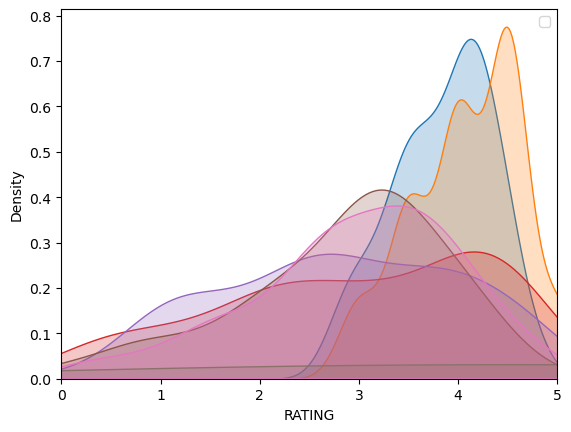

In [53]:
# Supposez que df est votre DataFrame et 'YEAR' est la colonne que vous voulez tracer
# Supposez que df est votre DataFrame et 'YEAR' est la colonne que vous voulez tracer
sns.kdeplot(data=seg, x='RATING', fill=True)
sns.kdeplot(data=seg, x='STARS', fill=True)
sns.kdeplot(data=seg, x='RottenTomatoes_norm', fill=True)
sns.kdeplot(data=seg, x='RTU_norm', fill=True)
sns.kdeplot(data=seg, x='Metacritic_norm', fill=True)
sns.kdeplot(data=seg, x='MetacriticU_norm', fill=True)
sns.kdeplot(data=seg, x='IMDB_norm', fill=True)

# Ajustez les étiquettes de l'axe x pour éviter le chevauchement
#plt.xticks(rotation=45, ha='right')
plt.xlim(0,5)
plt.legend()
# Affichez le tracé
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


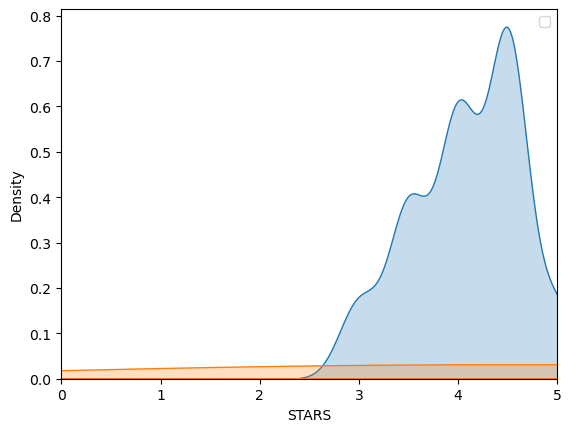

In [56]:
sns.kdeplot(data=seg, x='STARS', fill=True)
sns.kdeplot(data=seg, x='RottenTomatoes_norm', fill=True)
plt.xlim(0,5)
plt.legend()
plt.show()

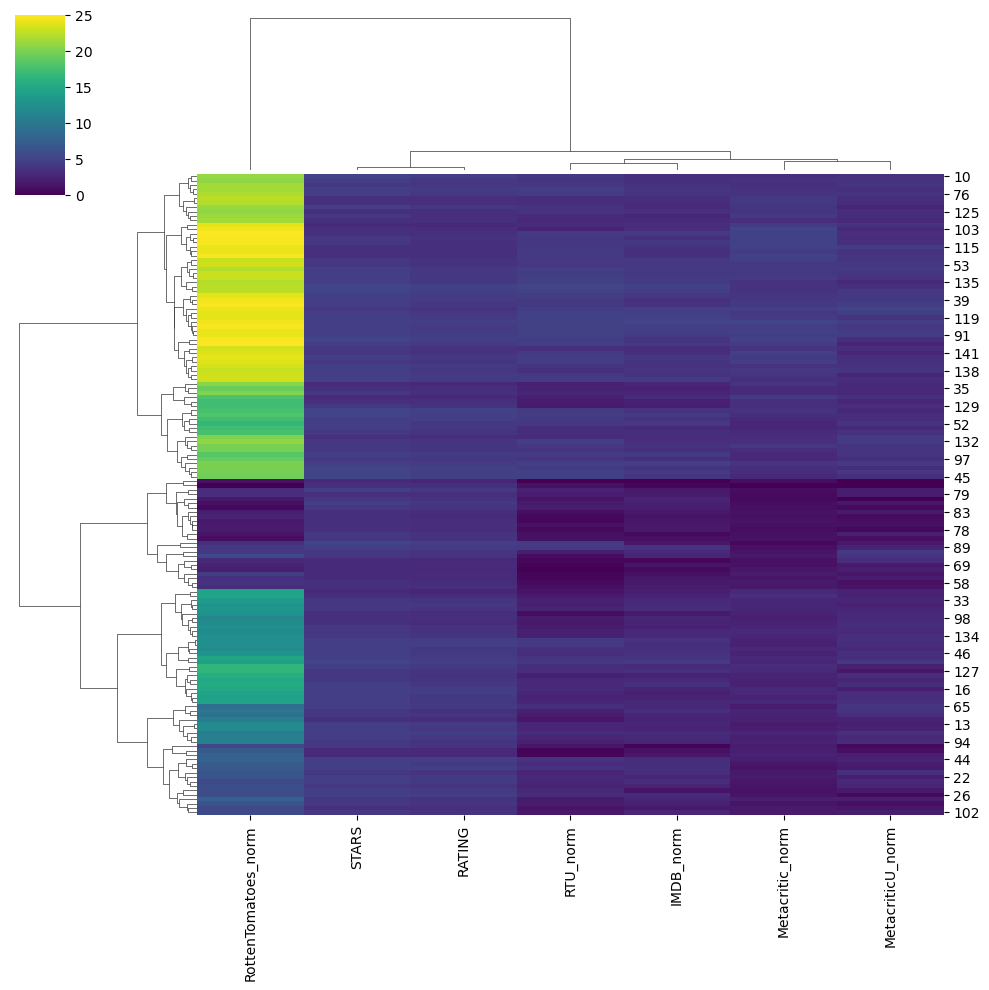

In [57]:
sns.clustermap(seg, cmap="viridis", method="complete")

In [73]:
seg.loc[:, 'Film'] = fusion['FILM'].copy()
seg = seg.drop(labels=None, axis=0, index=None, columns='Film', level=None, inplace=False, errors='raise')

C:\Users\ibrah\AppData\Local\Temp\ipykernel_21912\1352584408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seg.loc[:, 'Film'] = fusion['FILM'].copy()


In [76]:
seg.sort_values('RTU_norm',ascending = True).head(10).round(0)

,STARS,RATING,RottenTomatoes_norm,RTU_norm,Metacritic_norm,MetacriticU_norm,IMDB_norm,FILM
28,3.0,3.0,1.0,0.0,1.0,0.0,0.0,Fantastic Four (2015)
109,3.0,3.0,2.0,0.0,1.0,2.0,1.0,The Vatican Tapes (2015)
69,3.0,3.0,2.0,0.0,1.0,2.0,1.0,The Lazarus Effect (2015)
51,3.0,3.0,7.0,0.0,2.0,1.0,1.0,Poltergeist (2015)
75,3.0,3.0,4.0,0.0,2.0,1.0,1.0,The Woman In Black 2 Angel of Death (2015)
72,3.0,3.0,8.0,0.0,2.0,2.0,2.0,Blackhat (2015)
133,3.0,3.0,3.0,0.0,1.0,2.0,2.0,Serena (2015)
87,4.0,3.0,2.0,0.0,1.0,1.0,2.0,Unfinished Business (2015)
63,3.0,3.0,3.0,0.0,1.0,3.0,0.0,The Gallows (2015)
81,4.0,3.0,2.0,1.0,1.0,1.0,1.0,Hot Tub Time Machine 2 (2015)
